**Fait par Cazes Florian, Khanjar Youness et Lugiery Valentin**

# Projet Big Data Deep Learning M2MApI3 2021-2022

## QUESTION 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
def plot_learning_curves(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Importation des données "Landscape"

In [ ]:
!wget https://github.com/ml5js/ml5-data-and-models/raw/master/datasets/images/landscapes/landscapes_small.zip
!mkdir landscapes
!unzip landscapes_small.zip -d landscapes
!rm -r landscapes/__MACOSX

--2022-03-10 13:38:20--  https://github.com/ml5js/ml5-data-and-models/raw/master/datasets/images/landscapes/landscapes_small.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ml5js/ml5-data-and-models/master/datasets/images/landscapes/landscapes_small.zip [following]
--2022-03-10 13:38:20--  https://raw.githubusercontent.com/ml5js/ml5-data-and-models/master/datasets/images/landscapes/landscapes_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81935123 (78M) [application/zip]
Saving to: ‘landscapes_small.zip.1’

landscapes_small.zi 100%[===================>]  78.14M   389MB/s    in 0.2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

input_dir='landscapes'

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

train = datagen.flow_from_directory(input_dir, class_mode='categorical', subset='training', target_size=(254, 254))

test = datagen.flow_from_directory(input_dir, class_mode='categorical', subset='validation', target_size=(254, 254))


num_classes=7

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


(32, 254, 254, 3)
(32, 7)


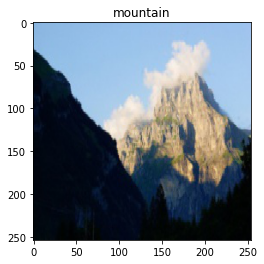

In [ ]:
label=["city", "field", "forest", "lake", "mountain", "ocean", "road"]
x,y=next(train)
print(x.shape)
print(y.shape)
plt.imshow(x[0]);
plt.title(label[np.argmax(y[0])]);

## QUESTION 2

Création du Premier réseau de neurones

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(254, 254, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)      0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history1 = model1.fit(
      train,
      steps_per_epoch=50,
      epochs=20,
      validation_data=test,
      validation_steps=20)

Epoch 1/20
50/50 [==============================] - 20s 171ms/step - loss: 2.2159 - accuracy: 0.2663 - val_loss: 1.4787 - val_accuracy: 0.4109
Epoch 2/20
50/50 [==============================] - 7s 145ms/step - loss: 1.4612 - accuracy: 0.4275 - val_loss: 1.4002 - val_accuracy: 0.4766
Epoch 3/20
50/50 [==============================] - 6s 119ms/step - loss: 1.3161 - accuracy: 0.5144 - val_loss: 1.1125 - val_accuracy: 0.5906
Epoch 4/20
50/50 [==============================] - 8s 150ms/step - loss: 1.3180 - accuracy: 0.5750 - val_loss: 0.8500 - val_accuracy: 0.6891
Epoch 5/20
50/50 [==============================] - 7s 145ms/step - loss: 1.0556 - accuracy: 0.6223 - val_loss: 0.9625 - val_accuracy: 0.6531
Epoch 6/20
50/50 [==============================] - 6s 116ms/step - loss: 1.1446 - accuracy: 0.6125 - val_loss: 0.9702 - val_accuracy: 0.6516
Epoch 7/20
50/50 [==============================] - 6s 118ms/step - loss: 0.9162 - accuracy: 0.6936 - val_loss: 0.7135 - val_accuracy: 0.7391
Epoch

In [ ]:
model1 = load_model("/content/drive/MyDrive/modelbase.h5")

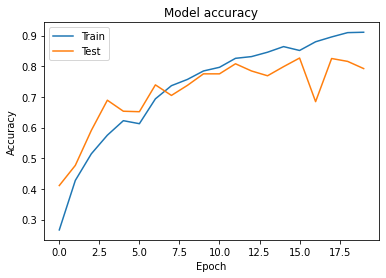

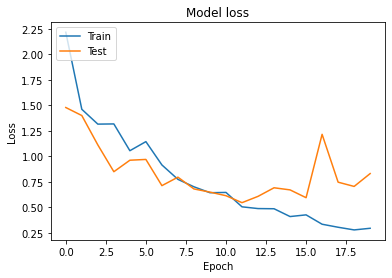

In [ ]:
plot_learning_curves(history1)

In [ ]:
pred1=model1.predict(x)
pred1=np.argmax(pred1,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
pred1

array([4, 2, 0, 1, 6, 4, 2, 1, 4, 1, 2, 2, 4, 2, 2, 2, 3, 2, 6, 3, 3, 3,
       2, 1, 4, 1, 2, 1, 3, 1, 5, 5])

In [ ]:
np.argmax(y,axis=1)

array([4, 2, 0, 4, 6, 4, 2, 1, 3, 1, 2, 2, 4, 2, 2, 2, 3, 2, 6, 3, 3, 3,
       2, 1, 4, 1, 2, 1, 3, 1, 5, 5])

In [ ]:
print(pred1[np.where(pred1!=np.argmax(y,axis=1))])
print(np.argmax(y,axis=1)[np.where(pred1!=np.argmax(y,axis=1))])

[1 4]
[4 3]


## QUESTION 3

Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(254, 254, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 128)     

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history2 = model2.fit(
      train,
      steps_per_epoch=50,
      epochs=20,
      validation_data=test,
      validation_steps=20)

Epoch 1/20
50/50 [==============================] - 7s 126ms/step - loss: 2.2004 - accuracy: 0.2535 - val_loss: 1.6194 - val_accuracy: 0.3625
Epoch 2/20
50/50 [==============================] - 8s 162ms/step - loss: 1.6404 - accuracy: 0.3941 - val_loss: 1.4514 - val_accuracy: 0.4469
Epoch 3/20
50/50 [==============================] - 6s 118ms/step - loss: 1.5039 - accuracy: 0.4603 - val_loss: 1.3752 - val_accuracy: 0.4531
Epoch 4/20
50/50 [==============================] - 6s 118ms/step - loss: 1.3821 - accuracy: 0.5113 - val_loss: 1.2179 - val_accuracy: 0.5406
Epoch 5/20
50/50 [==============================] - 6s 119ms/step - loss: 1.2583 - accuracy: 0.5481 - val_loss: 0.9745 - val_accuracy: 0.6641
Epoch 6/20
50/50 [==============================] - 6s 119ms/step - loss: 1.1765 - accuracy: 0.6129 - val_loss: 1.0619 - val_accuracy: 0.6203
Epoch 7/20
50/50 [==============================] - 6s 118ms/step - loss: 1.0426 - accuracy: 0.6288 - val_loss: 1.1136 - val_accuracy: 0.6125
Epoch 

In [ ]:
model2 = load_model("/content/drive/MyDrive/modeldrop.h5")

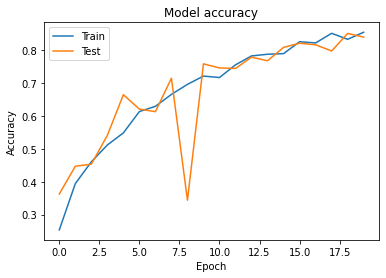

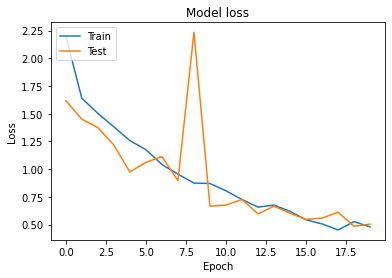

In [ ]:
plot_learning_curves(history2)

In [ ]:
pred2=model2.predict(x)
pred2=np.argmax(pred2,axis=1)

In [ ]:
print(pred2[np.where(pred2!=np.argmax(y,axis=1))])
print(np.argmax(y,axis=1)[np.where(pred2!=np.argmax(y,axis=1))])

[0 4]
[6 5]


Data Augmentation

In [ ]:
augmenting_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total height)
    height_shift_range=0.2,# randomly shift images vertically (fraction of total height)
    shear_range=0.2,# set range for random shear
    zoom_range=0.2,# set range for random zoom
    horizontal_flip=True,# randomly flip images
    fill_mode='nearest', # set mode for filling points outside the input boundaries
    validation_split=0.2 # split data in train and test
)

In [ ]:
train2 = augmenting_datagen.flow_from_directory(input_dir, class_mode='categorical', subset='training', target_size=(254, 254))

test2 = augmenting_datagen.flow_from_directory(input_dir, class_mode='categorical', subset='validation', target_size=(254, 254))


Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


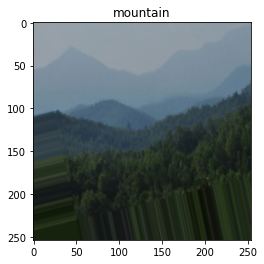

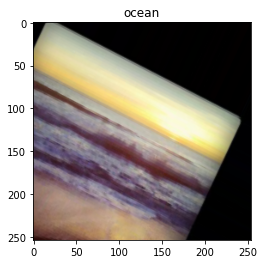

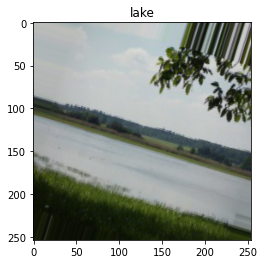

In [ ]:
x,y=next(train2)
for i in range(3):
    plt.imshow(x[i]);
    
    plt.title(label[np.argmax(y[i])]);
    plt.show();

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(254, 254, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history3 = model3.fit(
      train2,
      steps_per_epoch=50,
      epochs=20,
      validation_data=test2,
      validation_steps=20)

Epoch 1/20
50/50 [==============================] - 34s 667ms/step - loss: 2.8662 - accuracy: 0.1906 - val_loss: 1.7017 - val_accuracy: 0.3000
Epoch 2/20
50/50 [==============================] - 33s 659ms/step - loss: 1.7653 - accuracy: 0.3014 - val_loss: 1.4963 - val_accuracy: 0.4266
Epoch 3/20
50/50 [==============================] - 36s 719ms/step - loss: 1.7455 - accuracy: 0.4029 - val_loss: 1.6950 - val_accuracy: 0.3672
Epoch 4/20
50/50 [==============================] - 32s 640ms/step - loss: 1.4944 - accuracy: 0.4515 - val_loss: 1.5787 - val_accuracy: 0.3672
Epoch 5/20
50/50 [==============================] - 32s 639ms/step - loss: 1.3542 - accuracy: 0.4937 - val_loss: 1.3277 - val_accuracy: 0.5234
Epoch 6/20
50/50 [==============================] - 32s 644ms/step - loss: 1.2860 - accuracy: 0.5244 - val_loss: 1.2783 - val_accuracy: 0.4812
Epoch 7/20
50/50 [==============================] - 32s 648ms/step - loss: 1.1804 - accuracy: 0.5574 - val_loss: 1.0098 - val_accuracy: 0.6344

In [ ]:
model3 = load_model("/content/drive/MyDrive/modelaugm.h5")

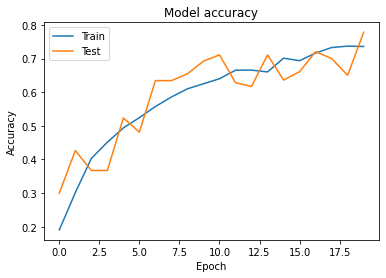

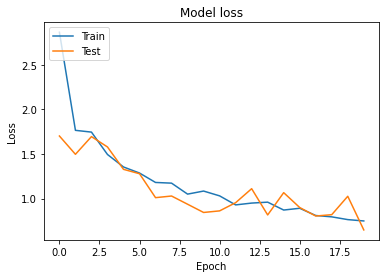

In [ ]:
plot_learning_curves(history3)

In [ ]:
pred3=model3.predict(x)
pred3=np.argmax(pred3,axis=1)

In [ ]:
print(pred3[np.where(pred3!=np.argmax(y,axis=1))])
print(np.argmax(y,axis=1)[np.where(pred3!=np.argmax(y,axis=1))])

[1 0 4 3 3 4 0 0 1 1 6 5]
[3 6 5 5 5 5 4 5 3 5 3 3]


## Question 4

Utilisation D'un Réseau de Neurones pré-entrainé

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(254, 254, 3))
conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 254, 254, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 254, 254, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 254, 254, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                              

In [ ]:
model4 = Sequential()
model4.add(conv_base)
model4.add(Flatten())
model4.add(Dense(256, activation='relu', name='features'))
model4.add(Dense(num_classes, activation='softmax'))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 features (Dense)            (None, 256)               6422784   
                                                                 
 dense_6 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,139,271
Trainable params: 21,139,271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
print('Voici le nombre de couches "trainable" après avoir gelé le modèle de base:', len(model4.trainable_weights))

model4.summary()

Voici le nombre de couches "trainable" après avoir gelé le modèle de base: 4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 features (Dense)            (None, 256)               6422784   
                                                                 
 dense_6 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,139,271
Trainable params: 6,424,583
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history4 = model4.fit(
      train,
      steps_per_epoch=50,
      epochs=20,
      validation_data=test,
      validation_steps=20)

Epoch 1/20
50/50 [==============================] - 25s 390ms/step - loss: 3.3840 - accuracy: 0.5164 - val_loss: 0.6119 - val_accuracy: 0.8109
Epoch 2/20
50/50 [==============================] - 15s 309ms/step - loss: 0.9587 - accuracy: 0.7437 - val_loss: 1.0476 - val_accuracy: 0.7172
Epoch 3/20
50/50 [==============================] - 16s 322ms/step - loss: 0.7503 - accuracy: 0.7912 - val_loss: 0.5417 - val_accuracy: 0.8250
Epoch 4/20
50/50 [==============================] - 16s 325ms/step - loss: 0.5443 - accuracy: 0.8266 - val_loss: 0.6296 - val_accuracy: 0.8172
Epoch 5/20
50/50 [==============================] - 16s 316ms/step - loss: 0.4627 - accuracy: 0.8687 - val_loss: 0.3993 - val_accuracy: 0.8750
Epoch 6/20
50/50 [==============================] - 16s 317ms/step - loss: 0.4067 - accuracy: 0.8752 - val_loss: 0.8577 - val_accuracy: 0.7703
Epoch 7/20
50/50 [==============================] - 16s 317ms/step - loss: 0.3426 - accuracy: 0.8969 - val_loss: 0.4011 - val_accuracy: 0.8906

In [ ]:
model4 = load_model("/content/drive/MyDrive/modeltrans.h5")

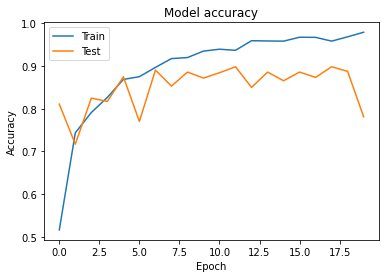

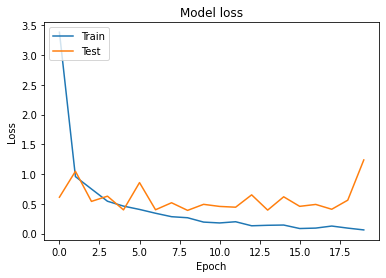

In [ ]:
plot_learning_curves(history4)

In [ ]:
pred4=model4.predict(x)
pred4=np.argmax(pred4,axis=1)

In [ ]:
print(pred4[np.where(pred4!=np.argmax(y,axis=1))])
print(np.argmax(y,axis=1)[np.where(pred4!=np.argmax(y,axis=1))])

[3 3]
[5 5]


## QUESTION 5

Comparaison des résultats

In [ ]:
import pandas as pd

Rappel:                
model1 = premier modèle              
model2 = dropout                     
model3 = data augmentation              
model4 = réseau pré entraîné

Colonnes:         
accuracy               
loss              
temps d'execution         



In [ ]:
model=[model1,model2,model3,model4]
ind=["Premier modèle","Dropout","Data augmentation","Transfert learning"]
acc=[]
los=[]
for i in range(4):
    e=model[i].evaluate(test)
    acc.append(e[1])
    los.append(e[0])
pd.DataFrame({'accuracy':acc,'loss':los},index=ind)

24/24 [==============================] - 9s 375ms/step - loss: 1.2504 - accuracy: 0.7762


,accuracy,loss
Premier modèle,0.797351,0.810378
Dropout,0.839735,0.501596
Data augmentation,0.765563,0.636304
Transfert learning,0.776159,1.250359


## QUESTION 6

Affichage de photos mal classées par nos NN

In [ ]:
y=np.argmax(y,axis=1)

Modele 1:
Image 1
label: ocean
prediction: mountain


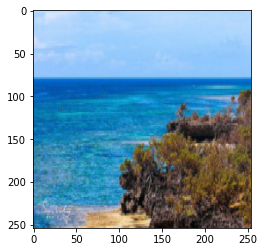

Image 2
label: ocean
prediction: lake


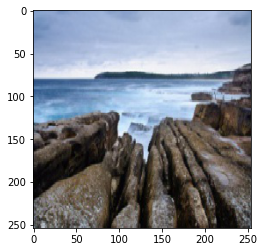

Image 3
label: ocean
prediction: mountain


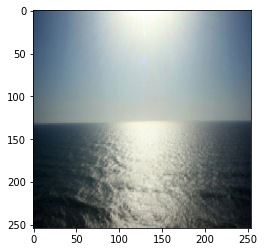

Modele 2:
Image 1
label: road
prediction: city


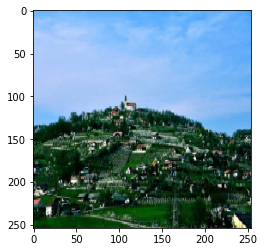

Image 2
label: ocean
prediction: mountain


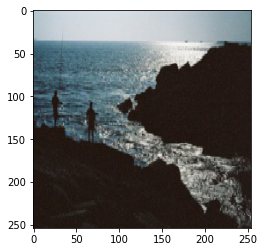

Modele 3:
Image 1
label: lake
prediction: field


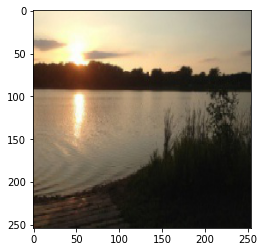

Image 2
label: road
prediction: city


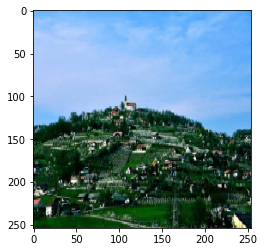

Image 3
label: ocean
prediction: mountain


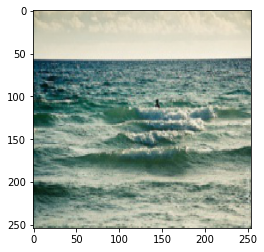

Image 4
label: ocean
prediction: lake


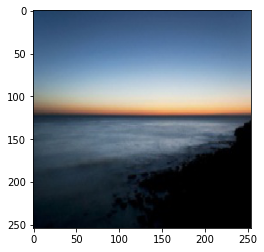

Image 5
label: ocean
prediction: lake


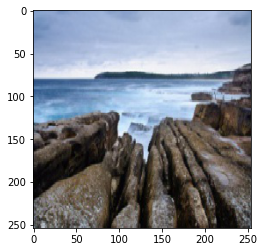

Image 6
label: ocean
prediction: mountain


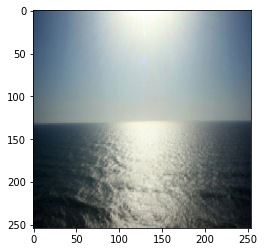

Image 7
label: mountain
prediction: city


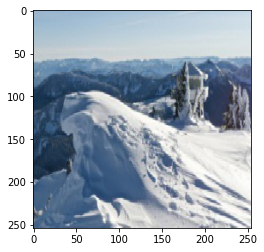

Image 8
label: ocean
prediction: city


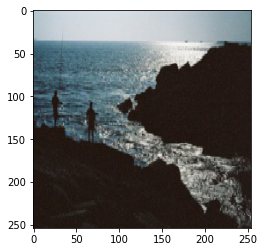

Image 9
label: lake
prediction: field


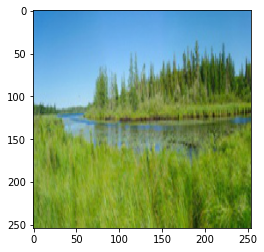

Image 10
label: ocean
prediction: field


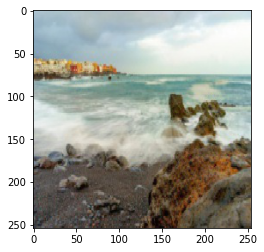

Image 11
label: lake
prediction: road


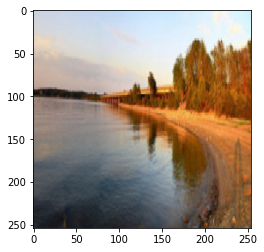

Image 12
label: lake
prediction: ocean


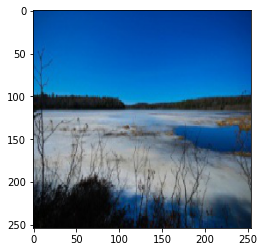

Modele 4:
Image 1
label: ocean
prediction: lake


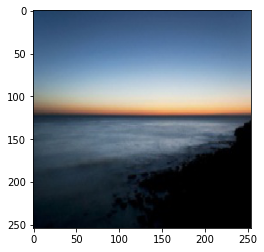

Image 2
label: ocean
prediction: lake


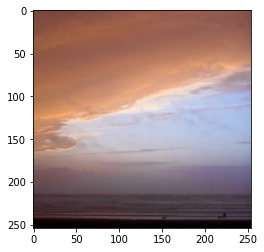

In [ ]:
pred=[np.argmax(model[i].predict(x),axis=1) for i in range(4)]
mal_classees=[np.where(pred[i]!=y)[0] for i in range(4)]
for i in range(4):
    print("Modele "+str(i+1)+":")
    for ind,j in enumerate(mal_classees[i]):
        plt.imshow(x[j])
        print(f'Image {ind+1}' )
        print("label: "+label[y[j]])
        print("prediction: "+label[np.argmax(model[i].predict(x)[j])])
        plt.show()

## QUESTION 7

Utilisation de t-SNE pour projeter des images dans l'ensemble des features

In [ ]:
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, 
                                            target_size=(254, 254), 
                                            batch_size=batch_size, 
                                            class_mode='sparse')
    x=[]
    i = 0
    for inputs_batch, labels_batch in generator:
        x.append(inputs_batch)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels,x

features, labels, x = extract_features(input_dir, 1000)

In [ ]:
x = np.array(x)
x=x.reshape(50*20,254,254,3)

In [ ]:
features2 = np.reshape(features, (features.shape[0], 7 * 7 * 512)).copy()

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE().fit_transform(features2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


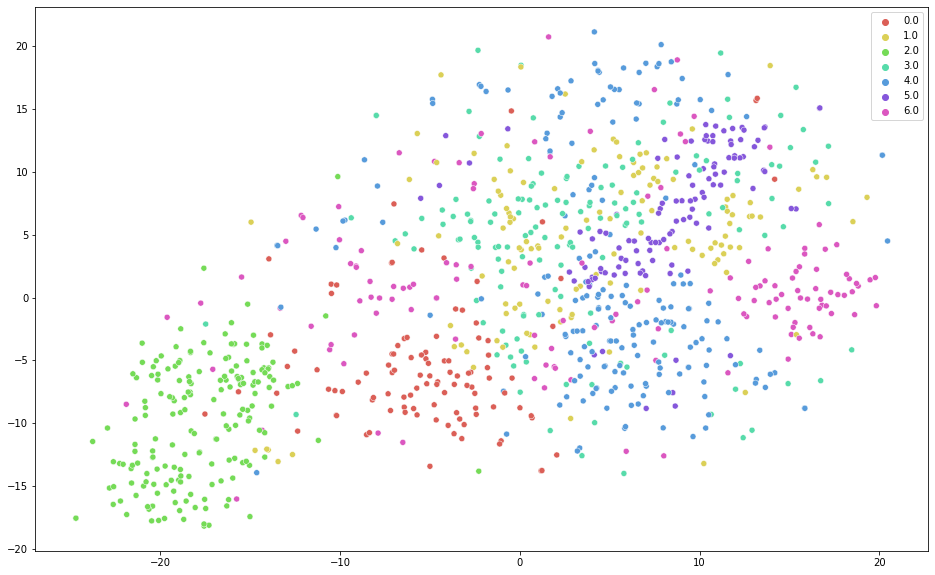

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 7),
    legend="full"
)

## QUESTION 8

Plus proches voisins d'une image dans l'espace des features

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree', metric = 'minkowski', p = 2).fit(X_tsne)
distances, indices = nbrs.kneighbors(X_tsne)

In [ ]:
indices

array([[  0, 563, 325, 564],
       [  1, 611, 866,  63],
       [  2, 112, 280, 708],
       ...,
       [997,   4, 701, 399],
       [998, 543, 115, 893],
       [999, 638,  14, 372]])

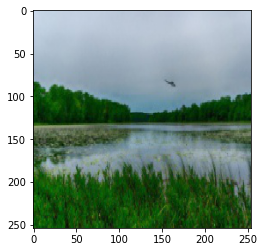

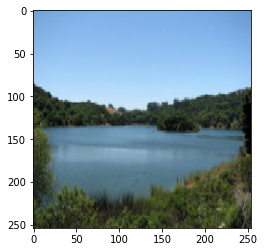

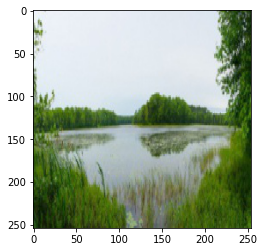

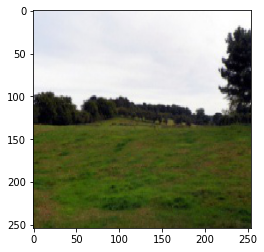

In [ ]:
plt.imshow(x[0]);
plt.show();
plt.imshow(x[563]);
plt.show();
plt.imshow(x[325]);
plt.show();
plt.imshow(x[564]);